<a href="https://colab.research.google.com/github/Sanja2000/Task-5/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

Tasks
Find the linear regression equation for this data.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

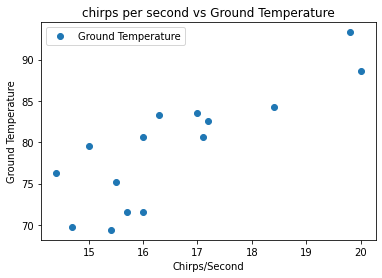

In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title("chirps per second vs Ground Temperature")
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [ ]:
df[['Chirps/Second', 'Ground Temperature']].corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, 1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 83) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[5.92911646]


In [ ]:
print(regressor.intercept_)

80.06666666666666


In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([77.9324474 , 76.29074027, 81.87254451])

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
df

,Actual,predicted
1,71.6,77.932447
5,75.2,76.290740
11,82.6,81.872545


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('R squared Error:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2.716881051764768
Mean Squared Error: 13.939598621437414
R squared Error: 0.3352247372141969


In [28]:
regressor.predict(scaler.transform([[21.2]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([95.00620155])

 Extrapolate data: If the ground temperature reached 95, the crickets chirping rate would be approximately 21.2

In [29]:
regressor.predict(scaler.transform([[18]]))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([84.49927592])

Interpolate data: With a listening device, i discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second the Ground temperature would be approximately 84.4